# Supervised Learning - Regression task
## Activity: Linear Regression - California Housing Dataset

## Introduction

### Context
The California Housing dataset, derived from the 1990 California census, is a staple in machine learning for regression tasks. Our goal is to predict median house values in California districts using various features from the dataset.

### Our Role as Data Scientists
We are simulating the role of data scientists, tasked with predicting house prices in California. This analysis is pivotal, serving stakeholders like real estate investors and government agencies for decision-making and policy formulation.

### Dataset Features
- Median Income
- Housing Average Age
- Average Rooms
- Average Bedrooms
- Population
- Average Occupation
- Latitude
- Longitude

We aim to predict the Median House Value using these features.

## Activity Goals

1. **Exploratory Data Analysis (EDA):** 
    - Employ visualizations and statistical summaries to grasp the data's characteristics.
    - Detect correlations, discern patterns, and uncover potential anomalies.

2. **Data Preprocessing:**
    - Address missing values and manage outliers.
    - Split the dataset into training and test sets.
    - Implement feature scaling to standardize the data for model training.
   
3. **Model Training:**
    - Implement a linear regression model.
    - Train the model with our preprocessed data.

4. **Model Evaluation:**
    - Assess model performance using Mean Squared Error (MSE) and R² score.
    - Determine the model's readiness for real-world application.

Let's start our journey of data exploration and predictive modeling!

## Import Necessary Libraries & Modules

In [1]:
# Importing pandas and numpy for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing fetch_california_housing to load the California housing dataset directly from sklearn
from sklearn.datasets import fetch_california_housing

# Importing train_test_split for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing StandardScaler for feature scaling, which is important for many machine learning models including linear regression
from sklearn.preprocessing import StandardScaler

# Importing LinearRegression, which is the machine learning model we'll use for predicting house values
from sklearn.linear_model import LinearRegression

# Importing mean_squared_error and r2_score for evaluating the performance of our linear regression model
from sklearn.metrics import mean_squared_error, r2_score

In this phase, we are bringing in all the essential Python libraries required for our analysis. We use `pandas` and `numpy` for handling and manipulating data, `sklearn` provides tools for our machine learning endeavors, and `matplotlib` along with `seaborn` are our choices for visualizing data effectively.

This setup ensures we have all the necessary tools at our disposal for a comprehensive data analysis and machine learning workflow.

# Load and Explore the Dataset

## 1. Load the California Housing dataset

In [2]:
# Fetches the California housing dataset
california_dataset = fetch_california_housing()

### Understanding the data object obtained

Exploring the different components of the dataset object

In [4]:
california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

The dataset includes data, target values, feature names, and descriptions

- **Target name**

Identifying the name of the target variable in the dataset

In [5]:
california_dataset.target_names

['MedHouseVal']

The target variable is `MedHouseVal`, representing the median house value

- **Features names**

Listing the names of the features in the dataset

In [6]:
california_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Features include median income, house age, rooms, bedrooms, population, etc.

- **DataSet Characteristics**

Displaying a detailed description of the dataset for a better understanding, including attributes and their descriptions.

In [6]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Convert the Data to a DataFrame

Converting the loaded data into a pandas DataFrame for easier analysis

In [3]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
df['MedianHouseValue'] = california_dataset.target

# The DataFrame 'df' now contains all features and the target variable for analysis

- We convert the dataset into a pandas DataFrame for easier manipulation.
- We add `MedianHouseValue` as a new column, representing our target variable.

- **Preview the DataFrame**

In [10]:
# Displaying the first few rows of the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Load the data to local

In [8]:
# Load the data to local
df.to_csv('data\california_housing_dataset.csv', index=False)

In [9]:
# Read the loaded data
data_frame = pd.read_csv('data\california_housing_dataset.csv')
data_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploratory Data Analysis

## 1. Data Inspection and Descriptive Statistics

**Dataset Information:**

To get an overview of the DataFrame's structure and data types:

In [13]:
# Viewing the information about DataFrame including the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


From this overview of the the DataFrame's structure and data types, we can identify the following:
- **Size and Structure:** The dataset contains 20,640 entries, organized across 9 columns.
- **Features and Target:** It includes 8 feature columns (such as `MedInc`, `HouseAge`, etc.) and 1 target column (`MedianHouseValue`).
- **Data Type and Completeness:** All columns are of the `float64` data type and there are no missing values in the dataset.

**Descriptive Statistics:**

Next, we will look at some descriptive statistics to understand the distribution of data.

In [14]:
# Displaying statistical summary of the DataFrame
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


From the summary description, we observe: 

1. **MedInc (Median Income):**
   - Ranges from 0.4999 to 15.0001.
   - The average median income is about 3.87.
   - Shows variation (std: 1.8998), indicating diverse income levels across districts.

2. **HouseAge:**
   - The ages of houses range from 1 to 52 years.
   - The average house age is approximately 28.64 years.
   - A standard deviation of 12.5855 suggests a wide range of house ages.

3. **AveRooms (Average Rooms):**
   - Varies dramatically from 0.846 to about 141.909, showing a wide disparity in room numbers.
   - The average number of rooms per household is around 5.43.

4. **AveBedrms (Average Bedrooms):**
   - Ranges from 0.333 to 34.067.
   - The average number of bedrooms is close to 1.1, with some variability (std: 0.4739).

5. **Population:**
   - The population count per block ranges widely from 3 to 35,682.
   - Mean population is 1425.48, but the large standard deviation (1132.46) indicates significant differences in population size across districts.

6. **AveOccup (Average Occupancy):**
   - Shows how many people on average live in a household, ranging from 0.692 to 1243.33.
   - The mean value is about 3.07, suggesting that on average, there are about 3 people per household.

7. **Latitude and Longitude:**
   - These columns represent the geographical location of the district.
   - Latitude ranges from 32.54 to 41.95, and Longitude from -124.35 to -114.31, covering a broad area of California.

8. **MedianHouseValue:**
   - The target variable, representing house values, ranges from 0.14999 to 5.00001 (in hundreds of thousands of dollars).
   - The average median house value is about 2.07, with a standard deviation of 1.15, indicating varying house prices across districts.

This summary gives an overall picture of the data's distribution, central tendency, and variability, which are crucial for understanding the dataset before moving into further analysis or model building.

## 2. Data Visualization

#### **Pairplot Visualization**

Creating a pairplot helps visualize relationships between the target variable and features.

In [ ]:
# Note: A full pairplot of the entire dataset is possible, but it may be time-consuming due to the dataset's size.
# Hence, focusing on visualizing relationships between 'MedianHouseValue' and other individual features.

# sns.pairplot(df) 

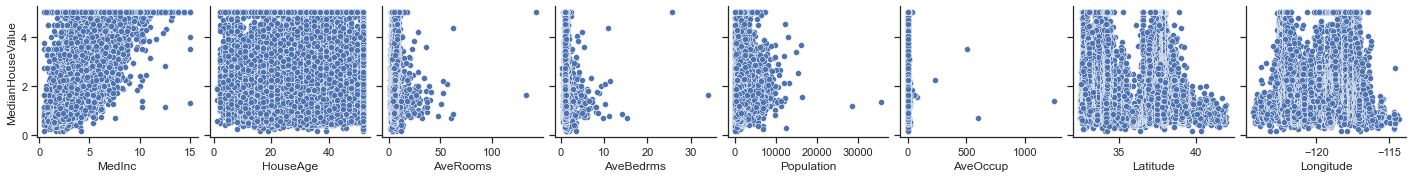

In [15]:
# Visualizing relationships between 'MedianHouseValue' and other features
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, y_vars=["MedianHouseValue"], x_vars=california_dataset.feature_names)
plt.show()

The pair plot provides a visual correlation between the median house value and various features, highlighting patterns and potential outliers across the dataset.

1. **MedInc (Median Income) vs. MedianHouseValue:**
   - There is a positive trend visible, indicating that as median income increases, median house values tend to increase as well. This suggests a possible strong correlation between these two variables.

2. **HouseAge vs. MedianHouseValue:**
   - The plot does not show a clear linear trend, suggesting that house age might not be a strong predictor of house values or the relationship might not be linear.

3. **AveRooms (Average Rooms) vs. MedianHouseValue:**
   - This plot shows some degree of positive correlation. However, there are outliers with an extremely high number of rooms that do not follow the general trend.

4. **AveBedrms (Average Bedrooms) vs. MedianHouseValue:**
   - Similar to AveRooms, there is a slight positive trend, but again with outliers that have a very high number of bedrooms, which seem to be driving the average up without a corresponding increase in house value.

5. **Population vs. MedianHouseValue:**
   - The plot doesn’t indicate a clear relationship between population and median house value, and the data points are quite spread out.

6. **AveOccup (Average Occupancy) vs. MedianHouseValue:**
   - There is a wide dispersion of data points, suggesting no clear linear relationship between average occupancy and house value. High occupancy rates do not seem to correspond to either higher or lower house values consistently.

7. **Latitude vs. MedianHouseValue:**
   - The plot shows a weak pattern, possibly indicating that location might have some impact on house values, but not a straightforward one.

8. **Longitude vs. MedianHouseValue:**
   - Similar to latitude, there is a weak pattern, suggesting some regional impact on house values, with no clear linear relationship.

Overall, from this pair plot, we can infer that median income has a significant positive association with median house values, while the other features show less clear patterns and would benefit from further analysis, possibly controlling for outliers or considering non-linear relationships.

#### **Correlation Analysis:**

Understanding how features correlate with the target variable is crucial in linear regression.

- **Correlation Matrix:**

    We will examine the correlation between different features.

In [19]:
# Calculating and displaying the correlation matrix
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


- **Function Overview:**
  - The `corr()` method calculates pairwise correlations between columns, excluding any missing values.

- **Correlation Values:**
  - The correlation coefficient ranges from -1 to 1.
    - **Positive Correlation (Close to 1):** Indicates a strong positive relationship, where an increase in one feature generally results in an increase in another.
    - **Negative Correlation (Close to -1):** Suggests a strong negative relationship, with an increase in one feature generally leading to a decrease in another.
    - **Near Zero (Close to 0):** Implies a very weak or no linear relationship between the features. As one feature changes, there is no consistent pattern of increase or decrease in the other.

- **Heatmap Visualization:**

  For a more visual representation of correlation matrix, we use a heatmap.

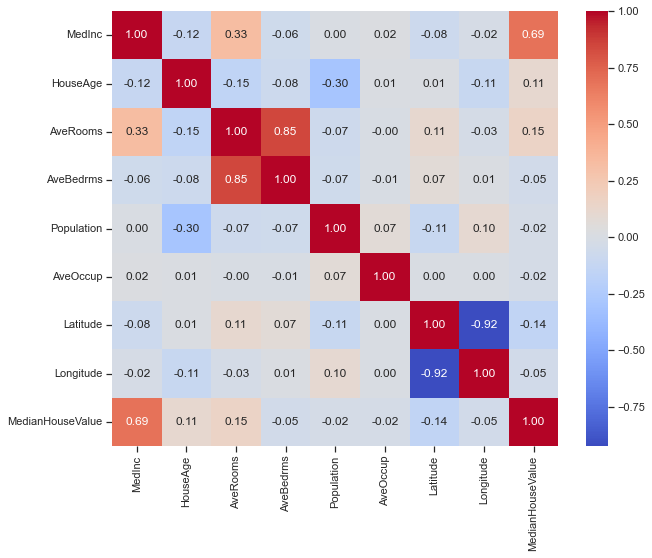

In [20]:
# Displaying a heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

A heatmap visualizes the correlation matrix, providing a color-coded representation of feature correlations. Positive correlations are represented with warmer colors, while negative correlations are represented with cooler colors.

Based on the correlation heatmap analysis, we observe the following key points:

- **Median Income (MedInc)** has a strong positive correlation (0.688) with the **Median House Value**, suggesting it's a good predictor for our linear regression model.

- **House Age** has a weak positive correlation with the **Median House Value** (0.106), indicating it may not be as strong a predictor.

- **Average Rooms (AveRooms)** and **Average Bedrooms (AveBedrms)** are highly correlated with each other (0.847), indicating potential multicollinearity. This suggests that including both of these features in a linear regression model may not be advisable because they provide redundant information.

- **Latitude** and **Longitude** show a very high negative correlation (-0.925), which is another instance of multicollinearity. It would be prudent to use only one of these features to avoid multicollinearity issues in the regression model. It's important to note that as geographic coordinates, they might not be directly useful for predicting house values unless transformed into more meaningful location-based features

- The other features (**Population**, **Average Occupancy (AveOccup)**) have very low correlation with the **Median House Value**, suggesting they might not be significant predictors on their own.

Given these observations:

- **Multicollinearity:** The high correlation between some predictors means that multicollinearity is present, which can affect the interpretability and the coefficients of a linear regression model. Techniques like Principal Component Analysis (PCA) or regularization methods (like Ridge or Lasso regression) might be used to address multicollinearity.
  
- **Implementing Linear Regression:** While proceeding with linear regression, it would be wise to consider feature selection to minimize multicollinearity. This could involve choosing between **AveRooms** and **AveBedrms**, and between **Latitude** and **Longitude**, rather than including all of them in the model. Additionally, since **MedInc** has a strong positive correlation with the target, it should definitely be included in the model as a predictor.

# I. Simple Linear Regression

In this section, we simplify our task by focusing on single-variable linear regression, using `Median Income `as the only feature to predict the `Median House Value`.

## 1. Separate Target and Feature

To build our simple linear regression model, we will focus solely on the `MedInc` feature due to its high correlation with the target `MedianHouseValue`. Begin by separating the dataset into features (X) and the target variable (y). Then, extract the MedInc feature from the dataset for the regression model.

In [21]:
# Selecting 'Median Income' as our feature and 'Median House Value' as our target
X = df[['MedInc']]
y = df['MedianHouseValue']

## 2. Splitting the Dataset

We then split our data into a training set and a testing set, using 80% of the data for training and 20% for testing to assess the model's performance.

In [22]:
# Splitting the dataset into training and testing sets with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Note :** The `random_state` is set for **reproducibility of results**. 
    
    The `random_state` parameter is crucial for ensuring consistent results across different runs. By setting it to a specific number (like 0 or 42), we ensure that the data shuffling prior to the split is identical each time the code is executed, thus guaranteeing that the same data is used for training and testing, which is essential for the reproducibility of the model's performance.

## 1. Create and Train our Model

We create a linear regression model instance and fit it to our training data.

In [23]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Fitting the model involves finding the best line that approximates the relationship between the feature and the target variable. 

The linear regression model will have the form:

$$
\text{MedianHouseValue} = \beta_0 + \beta_1 \times \text{MedInc} + \epsilon
$$

where:
- $\beta_0$ is the y-intercept of the regression line.
- $\beta_1$ is the slope, representing how much the median house value is expected to increase for each unit increase in median income.
- $\epsilon$ is the residual error, representing the difference between the observed and predicted values.

The β0 and β1 are learned from the data by the model.

## 3. Interpreting Model's Coefficients

The intercept and coefficient determined by the model are:

In [24]:
# Intercept (β0)
print(f'Intercept of the model: {model.intercept_:.4f}')

# Coefficient (β1) for 'MedInc'
print(f'Coefficient for MedInc: {model.coef_[0]:.4f}')

Intercept of the model: 0.4432
Coefficient for MedInc: 0.4203


- The intercept is the estimated median house value when median income is zero. 

- The coefficient is how much the median house value is expected to increase with each one-unit increase in median income.

For example, if our model's coefficient for `Median Income` is 0.4, this means that for each unit increase in median income, we expect the median house value to increase by 0.4 units.

**Note :** It's important to note that this interpretation assumes that the relationship between `Median Income` and `Median House Value` is linear, which may not always be the case in real-world data. Other factors that are not included in our model could also influence the house value.

## 4. Make Predictions Using the Test Set

Using the trained model to predict median house values based on the testing set:

In [30]:
# Predicting the median house values for the test set
y_pred = model.predict(X_test)
y_pred

array([2.18829831, 2.87249809, 2.27105966, ..., 1.78937091, 3.02549522,
       1.84397071])

These predictions are based on the linear relationship the model has learned during the training phase.

#### Example of Calculating Predictions

To demonstrate the prediction capability of our trained linear regression model, let's apply it to a specific example from our test set. We'll use a real value of median income from the `X_test` dataset to predict the median house value.

First, we take a peek at the head of the `X_test` dataset to select a value:

In [31]:
# Displaying the first few entries in the test set to select a value for prediction
X_test.head()

,MedInc
14740,4.1518
10101,5.7796
20566,4.3487
2670,2.4511
15709,5.0049


For the purpose of this example, let's select the first entry in our test set, which has an index of `14740`.

In [32]:
# Selecting the median income value from the test set for our prediction example
median_income_example = X_test.loc[14740]
print(f"Selected median income for prediction: {median_income_example}")

Selected median income for prediction: MedInc    4.1518
Name: 14740, dtype: float64


Now, using the intercept and coefficient learned from our model, we can make a prediction:

In [33]:
# Retrieving the intercept and coefficient from the trained model
intercept = model.intercept_
coefficient = model.coef_[0]

# Accessing the median income value for prediction
median_income_example = X_test.loc[14740].values[0]

# Making a prediction for the median house value using the model's intercept and coefficient
predicted_value = intercept + (coefficient * median_income_example)
print(f"The predicted median house value for a median income of {median_income_example} is: {predicted_value}")

The predicted median house value for a median income of 4.1518 is: 2.1882983059811636


Compare this predicted value with the actual one from our model:

In [34]:
# The actual predicted value from our model for the first entry in the test set
actual_predicted_value = y_pred[0]
print(f"Actual model's predicted value: {actual_predicted_value}")

Actual model's predicted value: 2.1882983059811636


This demonstrates that we obtain a matching result, illustrating how predictions are derived from the parameters learned by the model.

## 5. Evaluate the Model

We evaluate the model using the Mean Squared Error (MSE) and R² score:

In [26]:
# Calculating the performance metrics for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R²: {r2:.2f}')

MSE: 0.72, R²: 0.45


- MSE measures the average squared difference between actual and predicted values. 
    **The smaller the MSE, the better our model.**

- R² indicates the proportion of variance in the dependent variable that is predictable from the independent variable. 
    **The closer the R² score is to 1, the better our model.**

For our model:
- The MSE of 0.72 suggests a moderate average deviation of the predictions from the actual values.
- An R² of 0.45 indicates that the model explains 45% of the variance in the target variable, suggesting a moderate fit to the data.

## 6. Visualize the Model

Finally, we visualize the relationship between the test data and our model's predictions:

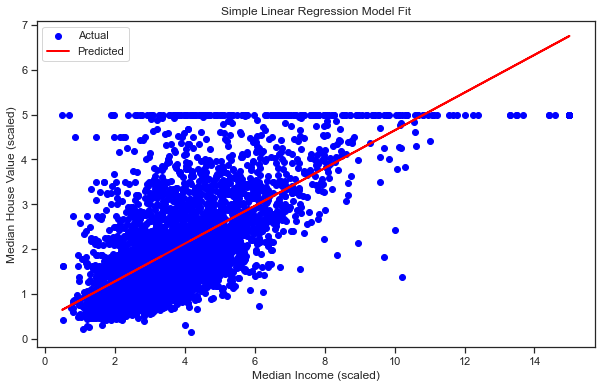

In [29]:
# Visualizing the actual values vs. the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test.values.ravel(), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income (scaled)')
plt.ylabel('Median House Value (scaled)')
plt.title('Simple Linear Regression Model Fit')
plt.legend()
plt.show()

The scatter plot shows the actual values, while the line represents our model's predictions. This visualization helps in understanding how well the model fits the test data.

**Note:** This simple model serves as a starting point. In practice, more complex models, feature engineering, and data preprocessing steps would likely be necessary to build an effective predictive model.

---

# II. Multiple linear Regression

In multiple linear regression, the goal is to predict a target variable by using two or more features. Unlike simple linear regression, which uses only one predictor, multiple linear regression can capture the relationship between the target and several independent variables.

Before building the model, it's important to get the data ready. This is especially true when you have several predictors, as scaling the data is key for the linear regression model to work well.

## 1. Data Preprocessing 

### a. Feature Selection

After examining the correlation between features and the target variable, we decide to include more predictors in addition to 'Median Income' to better capture the complexities in predicting 'Median House Value'. We'll use a set of features that showed significant correlations without multicollinearity concerns.

Based on the analysis and consideration to avoid multicollinearity:

- **Selected Features:** 'MedInc', 'AveRooms', 'HouseAge'
- **Dropped Features:** 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude' 

The reason to drop 'Population' and 'AveOccup' is due to their low correlation with the target variable, which implies they might not provide significant predictive power.

In [76]:
# Manually selected features
selected_features = ['MedInc', 'AveRooms', 'HouseAge']

# DataFrame with selected features for regression model
X = df[selected_features]

# Target variable for the model
y = df['MedianHouseValue']

### b. Splitting the Dataset

In [36]:
# Splitting the dataset into training (80%) and testing (20%) sets with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Printing the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (16512, 1) (16512,)
Testing set shape: (4128, 1) (4128,)


### c. Feature Scaling

**Feature Scaling: An Introduction**

Feature scaling is an essential data preprocessing step when working with machine learning algorithms. It aims to normalize the range of independent variables or features of the data. In simpler terms, it's about getting different variables to be on similar scales so no particular variable dominates others when feeding data to the model.

There are mainly two types of feature scaling: 
 
1. **Normalization (Min-Max Scaling):** This method scales the features such that they have values between 0 and 1.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

2. **Standardization (Z-score normalization):** This method scales the features such that they have a mean of 0 and a standard deviation of 1.

$$X_{standard} = \frac{X - \mu}{\sigma}$$

Where:
- $X$ is the original feature vector
- $\mu$ is the mean of the feature vector
- $\sigma$ is its standard deviation

In multiple linear regression, feature scaling is important because it standardizes the range of independent variables or features of data. Since the scale of the variables might differ significantly, unscaled data can potentially result in a biased or invalid model. A feature with a broad range of values can dominate the model and make the model unable to learn from other features correctly.

- **Note:** Remember that the scaling should be done after any train-test split to ensure that the test data remains unseen and is not influenced by the training process.

In [79]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled are the scaled versions of the training and testing sets, respectively

After this code, `X_train_scaled` and `X_test_scaled` are arrays containing the scaled values of your features. It's important to note that `fit` should only be called on `X_train` to prevent information leakage from the test set into the model training process. The same scaling parameters are then used to transform `X_test`.

Once you have scaled your data using StandardScaler from sklearn.preprocessing, you can transform the resulting NumPy arrays back into pandas DataFrames. This can be useful if you want to retain the DataFrame format for easier manipulation and indexing. 

In [80]:
# Convert the scaled arrays back into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Display the shapes to confirm they're still the same
print("Scaled training DataFrame shape:", X_train_scaled_df.shape)
print("Scaled testing DataFrame shape:", X_test_scaled_df.shape)

Scaled training DataFrame shape: (16512, 3)
Scaled testing DataFrame shape: (4128, 3)


## 2. Building the Multiple Linear Regression Model

To build a Multiple Linear Regression model using `scikit-learn`, We first create an instance of the `LinearRegression` class and fit it to our scaled training data along with the corresponding target values (`y_train`).

In [82]:
# Initialize the Multiple Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the training data
linear_regression_model.fit(X_train_scaled_df, y_train)

LinearRegression()

The mathematical representation of the learned model can be expressed as:

$$
\text{MedianHouseValue} = \beta_0 + \beta_1 \times \text{MedInc} + \beta_2 \times \text{AveRooms} + \beta_3 \times \text{HouseAge} + \epsilon$$

Each β represents the coefficient for its corresponding feature, and ϵ is the error term.

## 3. Interpretation of Results

In [86]:
# Retrieve the coefficients and pair them with feature names
coefficients = pd.DataFrame(linear_regression_model.coef_, X_train.columns, columns=['Coefficient'])

# Sort the coefficients by their absolute values in descending order for better comparison
coefficients['Absolute_Value'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values('Absolute_Value', ascending=False)

# Display the coefficients
print("Coefficients in the regression model:\n")
print(sorted_coefficients)

# Interpret the coefficients
print("\nInterpretation of the coefficients:\n")
for feature, row in sorted_coefficients.iterrows():
    print(f"{feature}: A one-standard-deviation increase in '{feature}' is associated with a {row['Coefficient']:.4f} {'increase' if row['Coefficient'] > 0 else 'decrease'} in the target variable.")

Coefficients in the regression model:

          Coefficient  Absolute_Value
MedInc       0.844375        0.844375
HouseAge     0.207161        0.207161
AveRooms    -0.085825        0.085825

Interpretation of the coefficients:

MedInc: A one-standard-deviation increase in 'MedInc' is associated with a 0.8444 increase in the target variable.
HouseAge: A one-standard-deviation increase in 'HouseAge' is associated with a 0.2072 increase in the target variable.
AveRooms: A one-standard-deviation increase in 'AveRooms' is associated with a -0.0858 decrease in the target variable.


- **Coefficient sign:**
The sign of a coefficient indicates the direction of the relationship between a predictor variable and the target variable. A positive coefficient means that there is a positive association – as the predictor variable increases by one standard deviation, the target variable is also expected to increase, holding all other variables constant. Conversely, a negative coefficient indicates a negative association – as the predictor variable increases by one standard deviation, the target variable is expected to decrease, again holding other variables constant.

In this case:
- A positive `MedInc` coefficient means that as median income (`MedInc`) increases, the median house value is expected to increase.
- A positive `HouseAge` coefficient suggests that as the age of the house (`HouseAge`) increases, the median house value is also expected to increase.
- A negative `AveRooms` coefficient indicates that as the average number of rooms per dwelling (`AveRooms`) increases, the median house value is expected to decrease.



- **Coefficient magnitude:**

The magnitude of a coefficient signifies the strength of the impact of the corresponding predictor on the target variable. Larger magnitudes mean a stronger effect, and smaller magnitudes mean a weaker effect.

From the provided coefficients:
- `MedInc` has the largest coefficient with an absolute value of 0.8444, indicating that median income is the most influential factor on median house value among the three features considered. An increase in median income is associated with a substantial increase in median house value.
- `HouseAge` has a smaller positive coefficient of 0.2072, suggesting that while there is a positive association with median house value, the impact of house age is less significant than median income.
- `AveRooms` has the smallest absolute value of the coefficient (-0.0858), indicating that it has the least influence on median house value compared to `MedInc` and `HouseAge`. Interestingly, this influence is in the negative direction, meaning that an increase in the average number of rooms per dwelling is associated with a slight decrease in median house value, which could suggest that beyond a certain point, larger dwellings (potentially indicating lower density or possibly higher maintenance costs) are not valued as much in the market represented by the dataset.

In conclusion, median income (`MedInc`) is the most significant predictor of median house value, followed by the age of the house (`HouseAge`), with the number of average rooms (`AveRooms`) having a lesser and negative impact. These interpretations must be considered in the context of the housing market and may be subject to additional factors not captured by the model.

## 4. Model Evaluation

In [84]:
# Predicting on training data
y_train_pred = linear_regression_model.predict(X_train_scaled_df)

# Predicting on test data
y_test_pred = linear_regression_model.predict(X_test_scaled_df)

# Calculate R-squared for both sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Absolute Error for both sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error for both sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error for both sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Printing the Results
metrics = [
    ('R-squared', r2_train, r2_test),
    ('Mean Absolute Error', mae_train, mae_test),
    ('Root Mean Squared Error', rmse_train, rmse_test)
]

# Create a header
header = f"{'Metric':<25} {'Training Set':<15} {'Test Set':<15}"
print(header)
print('-' * len(header))

# Print each metric for both training and test sets
for name, train_metric, test_metric in metrics:
    print(f"{name:<25} {train_metric:<15.2f} {test_metric:<15.2f}")

print("\nModel Performance Analysis:")
if r2_train > r2_test and rmse_train < rmse_test:
    print("Caution: The model may be overfitting to the training data.")
else:
    print("Good: The model's performance is consistent across training and test sets, indicating generalization.")

Metric                    Training Set    Test Set       
---------------------------------------------------------
R-squared                 0.51            0.52           
Mean Absolute Error       0.60            0.61           
Root Mean Squared Error   0.81            0.81           

Model Performance Analysis:
Good: The model's performance is consistent across training and test sets, indicating generalization.


- **Result Interpretation:**
    - **R-squared**: The R-squared values for both the training and test sets are quite close, 0.51 and 0.52, respectively. This suggests that the model explains a similar proportion of the variance in the target variable for both sets, which is a good indicator of the model's consistency.

    - **Mean Absolute Error (MAE)**: The MAE is also very similar between the training and test sets, 0.60 and 0.61, respectively. This shows that the model has, on average, a similar error margin for both training and test predictions.

    - **Root Mean Squared Error (RMSE)**: The RMSE is equal for both sets, 0.81. This indicates the model’s predictions are off by the same margin of the standard deviation of the errors over both datasets.


In summary, the metrics indicate that the model performs similarly on both the training and test sets, suggesting good generalization. There's no significant discrepancy that would indicate overfitting, which is when a model performs much better on the training data than on the test data. 

However, depending on the context, an R-squared of around 0.5 might be considered low, suggesting that the model does not explain as much of the variability in the dependent variable as one might like. It's worth considering whether model complexity needs to be increased or if additional relevant features are necessary to capture more of the variance.

- **Notes :**

In multiple regression, we cannot visualize the regression line as we did in simple linear regression, because we are now in a higher-dimensional space. However, we could visualize the relationship between the target and each individual feature.

Remember that multiple linear regression assumes that there is a **linear relationship between the features and the target variable**, and that the **features are not highly correlated with each other**. If these assumptions are violated, the model's predictions may be inaccurate. **Always make sure to check these assumptions when using multiple linear regression**.